In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import Evaluation_Attributes as Darwin 
import Data_Operation as DO

# Get Test Trader Data

In [2]:
test_data = DO.Preparation(folder_path='Test_trader_data').Get.loc[0:100,:]
test_data

,Time,Type,Volume,Symbol,Price,Time,Price,Commission,Swap,Profit
0,2020-07-13 11:46:13,Balance,0.00,0,0.00000,0,0.00000,0.00,0.00,3.00
1,2020-07-13 11:46:33,Balance,0.00,0,0.00000,0,0.00000,0.00,0.00,397.94
2,2020-07-15 16:45:00,Sell,0.01,AUDCAD,0.95411,2020-07-15 17:40:23,0.95145,-0.08,0.00,1.96
3,2020-07-15 16:30:00,Sell,0.01,AUDCAD,0.95379,2020-07-15 18:04:46,0.94973,-0.08,0.00,3.00
4,2020-07-15 16:30:00,Sell,0.01,AUDCAD,0.95377,2020-07-15 18:04:50,0.94966,-0.08,0.00,3.04
...,...,...,...,...,...,...,...,...,...,...
96,2020-08-28 14:30:01,Sell,0.01,NZDCAD,0.87630,2020-09-03 12:57:48,0.88119,-0.08,-0.13,-3.73
97,2020-08-28 19:00:01,Sell,0.03,NZDCAD,0.88347,2020-09-03 12:57:48,0.88119,-0.22,-0.41,5.22
98,2020-09-02 19:45:00,Buy,0.01,AUDNZD,1.08223,2020-09-03 13:00:00,1.08389,-0.08,-0.06,1.12
99,2020-09-02 05:30:00,Buy,0.01,AUDNZD,1.08418,2020-09-03 16:27:43,1.08477,-0.08,-0.06,0.40


# Get Market Data 

In [3]:
from Data_Operation import Market_Data , OpenClose_data

In [4]:
ETHUSD = Market_Data(
    Symbol='ETHUSD',
    Start_Date= "2022-01-01T00:00:00.000",
    End_Data="2022-02-01T00:00:00.000",
    Interval="1H"
).send_post_request

In [5]:
ETHUSD.head()

,time,open,high,low,close,volume
0,2022-01-05 16:04:00,3814.0,3814.1,3811.3,3811.6,0.016716
1,2022-01-05 16:05:00,3811.5,3811.5,3807.3,3807.4,0.015454
2,2022-01-05 16:06:00,3807.3,3809.1,3807.3,3808.2,0.008854
3,2022-01-05 16:07:00,3808.1,3810.3,3806.6,3806.6,0.009152
4,2022-01-05 16:08:00,3806.6,3808.0,3805.6,3805.8,0.009204


In [6]:
open_close = OpenClose_data(
    Symbol='ETHUSD',
    Start_Date= "2022-01-01T00:00:00.000",
    End_Data="2022-02-01T00:00:00.000",
).send_post_request

In [7]:
open_close

,candlewindow,utctime,close
0,-50% (start),2021-12-16 12:00:00,4067.5
1,-40% (start),2021-12-19 14:24:00,3934.3
2,-30% (start),2021-12-22 16:48:00,4004.2
3,-20% (start),2021-12-25 19:12:00,4073.2
4,-10% (start),2021-12-28 21:36:00,3825.2
5,(start),2022-01-01 00:00:00,3743.9
6,+10% (start),2022-01-04 02:24:00,3724.1
7,+20% (start),2022-01-07 04:48:00,3197.1
8,+30% (start),2022-01-10 07:12:00,3164.6
9,+40% (start),2022-01-13 09:36:00,3367.8


# Duration

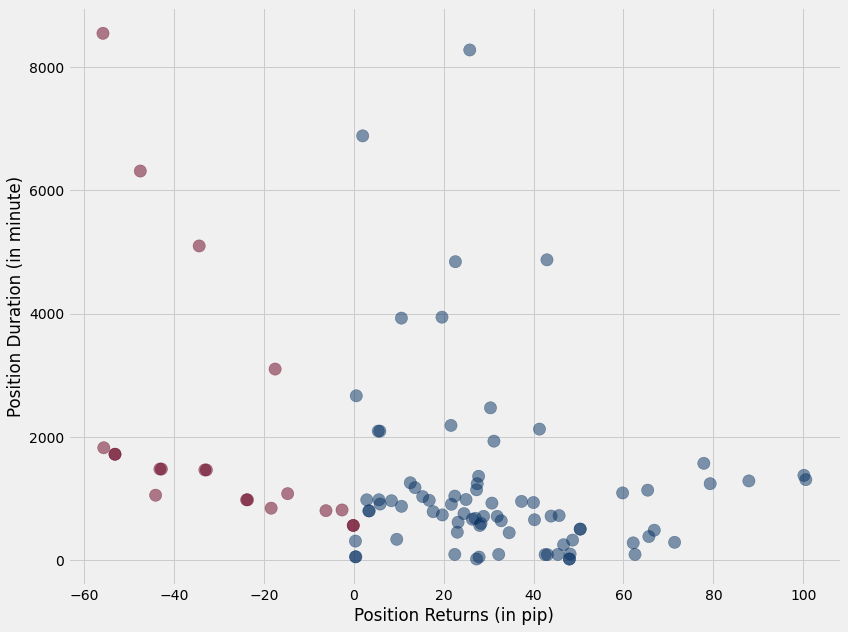

In [12]:
Duration = Darwin.Duration(data=test_data)

plt.figure(figsize=(12,9))
Duration.plot
plt.show()

In [10]:
Duration.Duration_data

,Position Duration (in minute),Position Returns (in pip)
0,55.38,27.879385
1,94.77,42.567022
2,94.83,43.092150
3,97.88,45.399738
4,105.00,48.125819
...,...,...
94,8547.78,-55.802807
95,8277.78,25.807328
96,1035.00,15.338699
97,2097.72,5.441901


# R_plus_minus

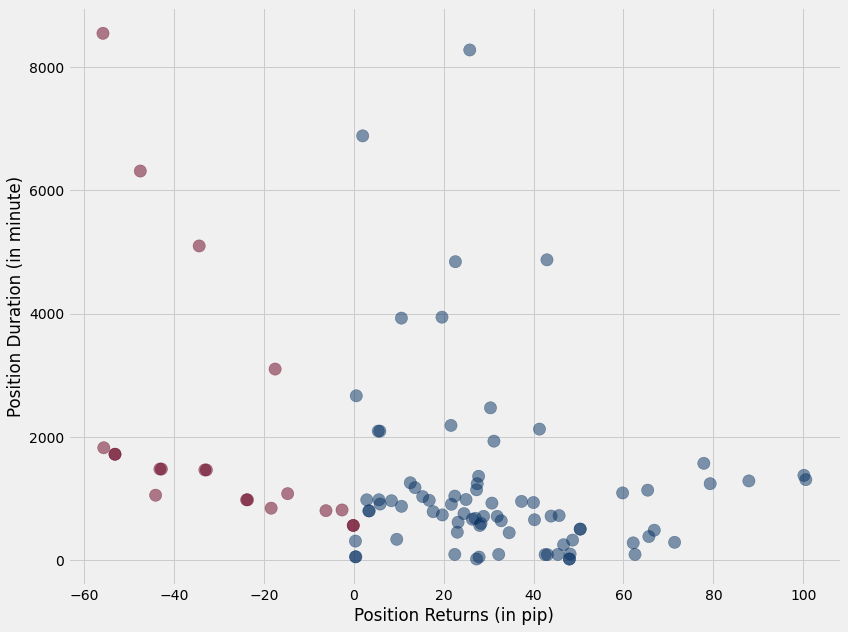

In [11]:
Rplusminus = Darwin.R_plus_minus(test_data) 

plt.figure(figsize=(12,9))
Rplusminus.plot
plt.show()

In [13]:
Rplusminus.Duration_data

,Position Duration (in minute),Position Returns (in pip)
0,55.38,27.879385
1,94.77,42.567022
2,94.83,43.092150
3,97.88,45.399738
4,105.00,48.125819
...,...,...
94,8547.78,-55.802807
95,8277.78,25.807328
96,1035.00,15.338699
97,2097.72,5.441901


# Capacity

In [14]:
capacity = Darwin.Capacity(dataframe=test_data,Max_Slippage=25)
capacity.Returns_Capacity

,Max_Slippage,1/2 Max_Slippage,1/4 Max_Slippage,1/5 Max_Slippage,Position Returns (in pip)
0,2.879385,15.379385,21.629385,22.879385,27.879385
1,17.567022,30.067022,36.317022,37.567022,42.567022
2,18.092150,30.592150,36.842150,38.092150,43.092150
3,20.399738,32.899738,39.149738,40.399738,45.399738
4,23.125819,35.625819,41.875819,43.125819,48.125819
...,...,...,...,...,...
94,-80.802807,-68.302807,-62.052807,-60.802807,-55.802807
95,0.807328,13.307328,19.557328,20.807328,25.807328
96,-9.661301,2.838699,9.088699,10.338699,15.338699
97,-19.558099,-7.058099,-0.808099,0.441901,5.441901


<AxesSubplot:>

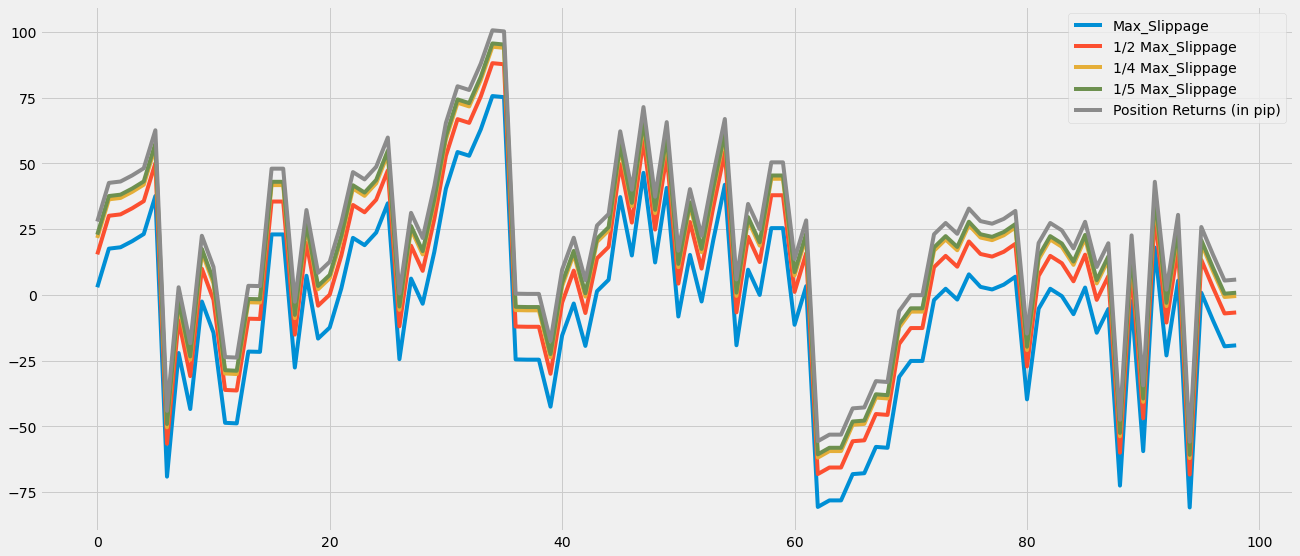

In [15]:
capacity.Returns_Capacity.plot(figsize=(20,9))

# loss_Aversion

<AxesSubplot:>

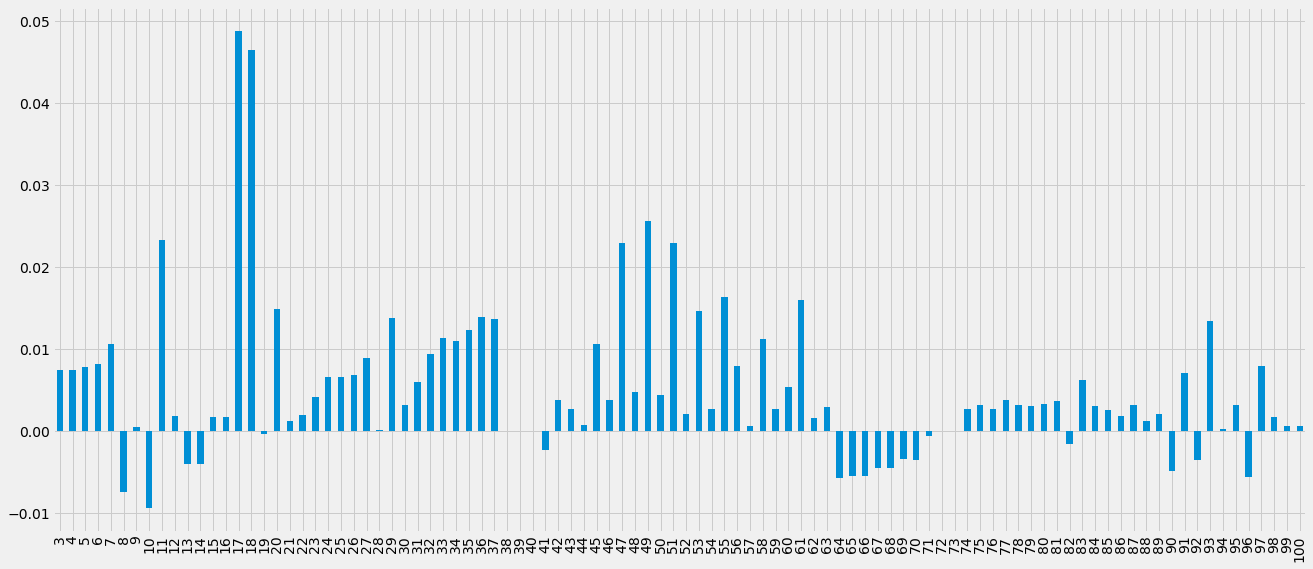

In [22]:
lossAversion = Darwin.Loss_Aversion(test_data)

lossAversion.LossAversion.plot.bar(figsize=(20,9))

# Market Correlation 

In [8]:
Market_corr = Darwin.Market_Correlation(
    trading_data=test_data,
    start_date=pd.to_datetime('2020-07-28 14:30:01'),
    end_date= pd.to_datetime('2020-09-02 05:30:00'),
    Experience=12
)

Market_corr.portfolio_return
Market_corr.correlation

,correlation,Weight
AUDNZD,0.0332,0.168675
NZDCAD,0.224377,0.626506
AUDCAD,0.288899,0.204819


# Experience

In [9]:
Exper = Darwin.Experience(
    dataframe= test_data
)

In [15]:
Exper.Representative_list

[3.8113675746669577,
 3.8113675746669577,
 4.998965364162517,
 4.587237264109293,
 4.8285393103548495,
 6.015583264833794,
 7.074365778414633,
 4.429509282829705,
 5.005240290538579]

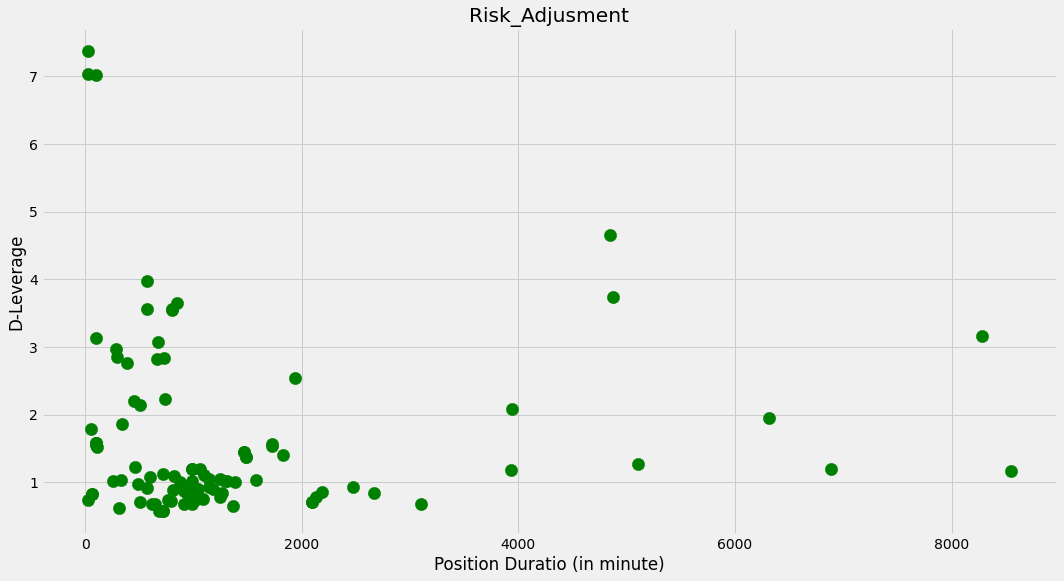

In [36]:
plt.figure(figsize=(15,8))
plt.style.use('fivethirtyeight')
plt.scatter(
    x = Exper.D_Leverage_Duration.loc[:,'Position Duration'],
    y = Exper.D_Leverage_Duration.loc[:,'D-Leverage'],
    s=150,
    c = 'g'
)
plt.xlabel('Position Duratio (in minute)')
plt.ylabel('D-Leverage')
plt.tight_layout()
plt.title('Risk_Adjusment')
plt.show()

# Open  close Startegy

In [3]:
oscs = Darwin.OS_CS(trading_data=test_data)

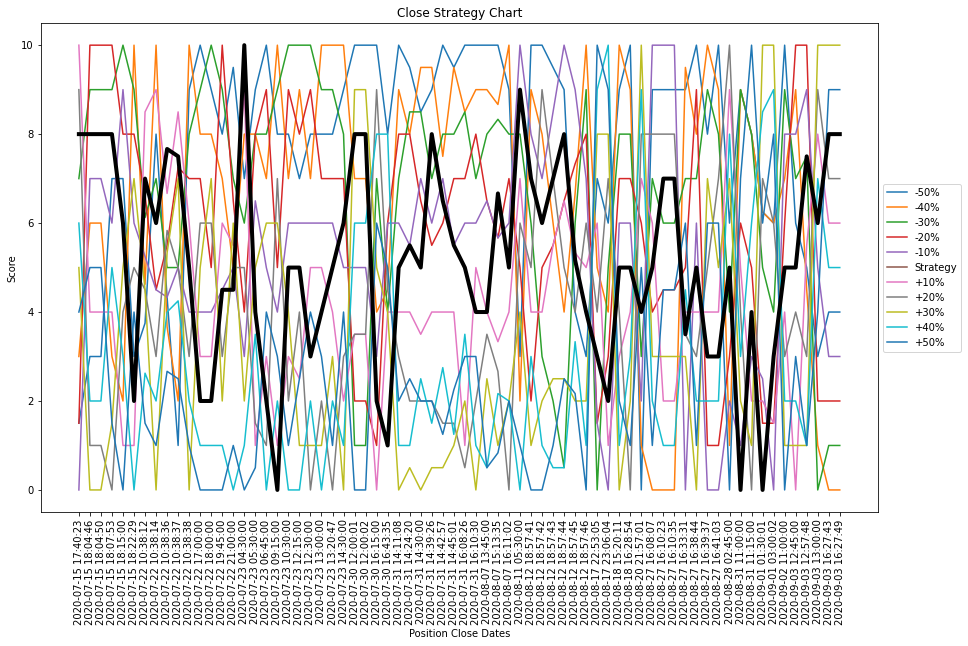

In [7]:
plt.figure(figsize=(15,9))
oscs.plot_close_strategy

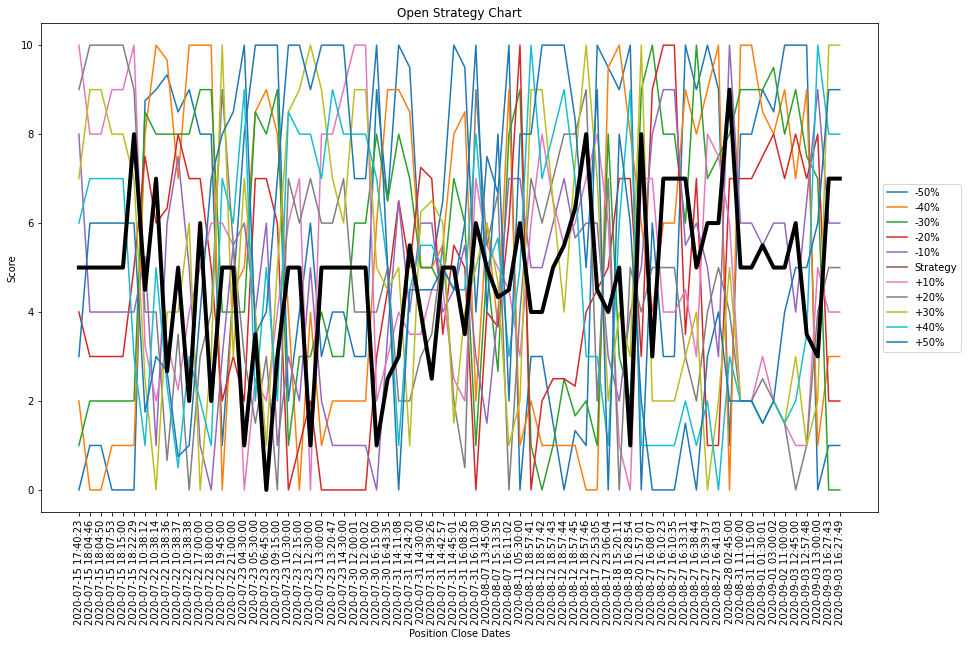

In [8]:
plt.figure(figsize=(15,9))
oscs.plot_open_strategy